## CS 457 - Homework Assignment 8: Regression
### Fahad Ahmed
#### fs05847@st.habib.edu.pk

In [958]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [959]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw8/EmployeeSalaryRegression.csv')

In [960]:
df

,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,3,0,17,3,2,9,6,0,8,5390


# Q1

In [961]:
model1 = ols("MonthlyIncome ~ TotalWorkingYears", data=df).fit()

In [962]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.73e-292
Time:                        02:16:07   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### y-interception = Intercept = 1227 ~ 1228: it means that staring salary for the employee is 1227
### gradient = 467: If working year of employee increases by 1 unit so the avegrage monthly income increases by 467 for the employee.

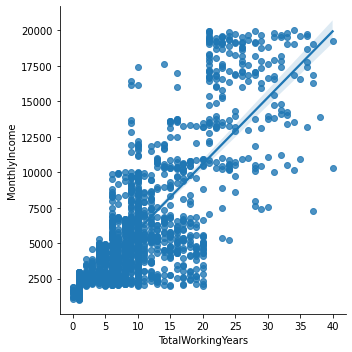

In [963]:
sns.lmplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)

## y-axis = "monthlyincome", x-axis = "totalworkingyears"
as we can see from the graph above that "totalworkingyears" and "monthlyincome" has positive linear relationship.

# Q2

In [964]:
X = df.drop(['DistanceFromHome'],axis=1)
Y = df['DistanceFromHome']

In [965]:
model2 = sm.OLS(Y,sm.add_constant(X['Age'])).fit()

In [966]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.948
Time:                        02:16:09   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### there is no relation between "Age" and "DistanceFromHome" because R-squared value is 0.0 and p-value is greater than 0.05 so it means there is no connection between "Age" and "DistanceFromHome" and also the gradient is also very close to 0 so no relation
y-interception = const = 9.247. which means that when the Age is 0 the DistanceFromHome of that person is 9.274 units. 

Text(0, 0.5, 'DistanceFromHome')

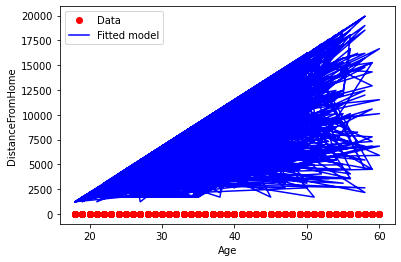

In [967]:
plt.plot(df['Age'],df['DistanceFromHome'],'ro')
plt.plot(df['Age'],model.fittedvalues,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

### As we can see from the above graph that there is no relation between "Age" and 'DistanceFromHome' because there is horizontal line of bestfit and the gradient from above summary is almost zero. so we can conclude that with increase or decrese in "Age", the "DistanceFromHome" does not change

## q3

In [968]:
df3 = df[['DistanceFromHome','MonthlyIncome','TotalWorkingYears','Age']]

In [969]:
df3.corr()

,DistanceFromHome,MonthlyIncome,TotalWorkingYears,Age
DistanceFromHome,1.000000,-0.017014,0.004628,-0.001686
MonthlyIncome,-0.017014,1.000000,0.772893,0.497855
TotalWorkingYears,0.004628,0.772893,1.000000,0.680381
Age,-0.001686,0.497855,0.680381,1.000000


### the correlation between Age and DistancefromHome is weak negative/postive linear relationship because the value is very close to 0
### the correlation between Monthlyincome and DistancefromHome is weak negative/postive linear relationship because the value is very close to 0 
### the correlation between totalworkingyears and DistancefromHome is weak negative/postive linear relationship because the value is very close to 0 

### the correlation between Monthlyincome and totalworkingyears is strong postive linear relationship because the value is close to 1
### the correlation between Monthlyincome and Age is postive linear relationship because the value is between 0 and 1

### the correlation between Age and totalworkingyears is postive linear relationship because the value is closer to 1 

## q4

In [970]:
df1 = df.drop(['JobRole'],axis=1)

In [971]:
df1 = pd.get_dummies(df1, columns = ['Department','EducationField','Gender','MaritalStatus','OverTime'])

In [972]:
X = df1.drop(['MonthlyIncome'],axis=1)
Y = df1['MonthlyIncome']

In [973]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [974]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     553.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:16:10   Log-Likelihood:                -12756.
No. Observations:                1470   AIC:                         2.557e+04
Df Residuals:                    1443   BIC:                         2.571e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -505.3012    157.844     -3.201      0.001    -814.930    -195.673
Age                                 -11.7080      5.871     -1.994      0.046     -23.225      -0.191
DistanceFromHome                    -12.5285      4.640     -2.700      0.007     -21.630      -3.426
Education                            -8.9850     37.792     -0.238      0.812     -83.119      65.149
HourlyRate                            2.3490      1.852      1.268      0.205      -1.284       5.982
JobLevel                           3837.4641     56.020     68.502      0.000    3727.575    3947.353
NumCompaniesWorked                    3.0231     16.809      0.180      0.857     -29.949      35.995
PerformanceRating                    27.7078    104.140      0.266      0.790    -176.574     231.990
StockOptionLevel                    -83.7209     60.423     -1.386      0.166    -202.248      34.806
TotalWorkingYears                    54.4121     10.461      5.201      0.000      33.892      74.932
TrainingTimesLastYear                -5.5468     29.423     -0.189      0.850     -63.264      52.170
WorkLifeBalance                     -11.3447     53.538     -0.212      0.832    -116.366      93.677
YearsAtCompany                       10.4545     13.079      0.799      0.424     -15.201      36.110
YearsInCurrentRole                  -15.4321     17.046     -0.905      0.365     -48.870      18.006
YearsSinceLastPromotion              18.5114     15.022      1.232      0.218     -10.956      47.979
YearsWithCurrManager                -49.7637     17.396     -2.861      0.004     -83.889     -15.639
Department_Human Resources          -32.5496    177.440     -0.183      0.854    -380.618     315.519
Department_Research & Development   -55.4496     99.943     -0.555      0.579    -251.499     140.600
Department_Sales                   -417.3020    109.672     -3.805      0.000    -632.436    -202.168
EducationField_Human Resources      111.3251    307.974      0.361      0.718    -492.799     715.449
EducationField_Life Sciences       -112.7923     91.523     -1.232      0.218    -292.324      66.739
EducationField_Marketing           -118.4517    139.941     -0.846      0.397    -392.961     156.057
EducationField_Medical              -60.6225     96.230     -0.630      0.529    -249.387     128.142
EducationField_Other               -249.8672    152.805     -1.635      0.102    -549.611      49.876
EducationField_Technical Degree     -74.8926    128.937     -0.581      0.561    -327.817     178.032
Gender_Female                      -276.9431     89.618     -3.090      0.002    -452.738    -101.148
Gender_Male                        -228.3582     85.914     -2.658      0.008    -396.887     -59.829
MaritalStatus_Divorced 

### 
Most signinfcant inputs: JobLevel, TotalWorkingYears, Department_Sales. because their p-value is zero or very close to zero. it means that they have big impact on the monthlyincome.
least signinfcant: NumCompaniesWorked, WorkLifeBalance, TrainingTimesLastYear. because their p-value is above 0.05 so it means they have less impact on monthlyincome

## model is 90.9% effectivesnnes because the r-sqaured value is 0.909 so it is pretty much effective

### the relation between MonthlyIncome and JobLevel is positive linear. the gradient between them is 3788 which means with every 1 unit increase in JobLevel the MonthlyIncome will increase by average of 3837 unit.
### the relation between MonthlyIncome and TrainingTimesLastYear is negative linear relationship. if employee increases his TrainingTimesLastYear by 1 unit then his MonthlyIncome will decrease by average of -5.5 units.
### MonthlyIncome and HourlyRate has postive linear relation. as from table we can see the relationship rate (gradient) as 2.36 which means that if employee's HourlyRate increases by 1 unit then his MonthlyIncome increases by average of 2.35 units 

In [975]:
dfn = df

In [976]:
dfn['Adult'] = 'No'
dfn.loc[dfn['Age'] > 30, 'Adult'] = 'Yes'

In [977]:
dfn = dfn.drop(['JobRole'],axis=1)

In [978]:
dfn = pd.get_dummies(dfn, columns = ["Adult",'Department','EducationField','Gender','MaritalStatus','OverTime'])

In [979]:
X = dfn.drop(['MonthlyIncome'],axis=1)
Y = dfn['MonthlyIncome']

In [980]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     553.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:16:10   Log-Likelihood:                -12756.
No. Observations:                1470   AIC:                         2.557e+04
Df Residuals:                    1443   BIC:                         2.571e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -505.3012    157.844     -3.201      0.001    -814.930    -195.673
Age                                 -11.7080      5.871     -1.994      0.046     -23.225      -0.191
DistanceFromHome                    -12.5285      4.640     -2.700      0.007     -21.630      -3.426
Education                            -8.9850     37.792     -0.238      0.812     -83.119      65.149
HourlyRate                            2.3490      1.852      1.268      0.205      -1.284       5.982
JobLevel                           3837.4641     56.020     68.502      0.000    3727.575    3947.353
NumCompaniesWorked                    3.0231     16.809      0.180      0.857     -29.949      35.995
PerformanceRating                    27.7078    104.140      0.266      0.790    -176.574     231.990
StockOptionLevel                    -83.7209     60.423     -1.386      0.166    -202.248      34.806
TotalWorkingYears                    54.4121     10.461      5.201      0.000      33.892      74.932
TrainingTimesLastYear                -5.5468     29.423     -0.189      0.850     -63.264      52.170
WorkLifeBalance                     -11.3447     53.538     -0.212      0.832    -116.366      93.677
YearsAtCompany                       10.4545     13.079      0.799      0.424     -15.201      36.110
YearsInCurrentRole                  -15.4321     17.046     -0.905      0.365     -48.870      18.006
YearsSinceLastPromotion              18.5114     15.022      1.232      0.218     -10.956      47.979
YearsWithCurrManager                -49.7637     17.396     -2.861      0.004     -83.889     -15.639
Department_Human Resources          -32.5496    177.440     -0.183      0.854    -380.618     315.519
Department_Research & Development   -55.4496     99.943     -0.555      0.579    -251.499     140.600
Department_Sales                   -417.3020    109.672     -3.805      0.000    -632.436    -202.168
EducationField_Human Resources      111.3251    307.974      0.361      0.718    -492.799     715.449
EducationField_Life Sciences       -112.7923     91.523     -1.232      0.218    -292.324      66.739
EducationField_Marketing           -118.4517    139.941     -0.846      0.397    -392.961     156.057
EducationField_Medical              -60.6225     96.230     -0.630      0.529    -249.387     128.142
EducationField_Other               -249.8672    152.805     -1.635      0.102    -549.611      49.876
EducationField_Technical Degree     -74.8926    128.937     -0.581      0.561    -327.817     178.032
Gender_Female                      -276.9431     89.618     -3.090      0.002    -452.738    -101.148
Gender_Male                        -228.3582     85.914     -2.658      0.008    -396.887     -59.829
MaritalStatus_Divorced 

### with new input no, the prediction of the model remains same. No change

## q5

In [981]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw8/EmployeeSalaryRegression.csv')

In [982]:
df1 = df.drop(['JobRole'],axis=1)

In [983]:
df1 = pd.get_dummies(df1, columns = ['Department','EducationField','Gender','MaritalStatus','OverTime'])

In [984]:
X = df1.drop(['HourlyRate'],axis=1)
Y = df1['HourlyRate']

In [985]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [986]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7801
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.777
Time:                        02:16:10   Log-Likelihood:                -6502.8
No. Observations:                1470   AIC:                         1.306e+04
Df Residuals:                    1443   BIC:                         1.320e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                22.1318      2.174     10.183      0.000      17.868      26.395
Age                                   0.0686      0.084      0.822      0.411      -0.095       0.232
DistanceFromHome                      0.0799      0.066      1.210      0.227      -0.050       0.209
Education                             0.2245      0.537      0.418      0.676      -0.829       1.278
JobLevel                             -2.9099      1.639     -1.775      0.076      -6.125       0.305
NumCompaniesWorked                    0.1098      0.239      0.460      0.646      -0.359       0.578
PerformanceRating                    -0.2037      1.479     -0.138      0.891      -3.106       2.698
StockOptionLevel                      1.4043      0.858      1.636      0.102      -0.279       3.088
TotalWorkingYears                     0.0488      0.150      0.326      0.745      -0.245       0.343
TrainingTimesLastYear                -0.0885      0.418     -0.212      0.832      -0.908       0.731
WorkLifeBalance                       0.0555      0.761      0.073      0.942      -1.436       1.547
YearsAtCompany                        0.0784      0.186      0.422      0.673      -0.286       0.443
YearsInCurrentRole                   -0.1343      0.242     -0.554      0.579      -0.609       0.341
YearsSinceLastPromotion              -0.1615      0.213     -0.757      0.449      -0.580       0.257
YearsWithCurrManager                 -0.0267      0.248     -0.108      0.914      -0.513       0.459
MonthlyIncome                         0.0005      0.000      1.268      0.205      -0.000       0.001
Department_Human Resources            7.9547      2.512      3.167      0.002       3.027      12.882
Department_Research & Development     7.3243      1.407      5.206      0.000       4.565      10.084
Department_Sales                      6.8528      1.555      4.406      0.000       3.802       9.904
EducationField_Human Resources       -1.4088      4.375     -0.322      0.747      -9.991       7.173
EducationField_Life Sciences          5.9693      1.291      4.623      0.000       3.436       8.502
EducationField_Marketing              5.7862      1.983      2.918      0.004       1.897       9.675
EducationField_Medical                4.2417      1.363      3.113      0.002       1.569       6.915
EducationField_Other                  1.7511      2.172      0.806      0.420      -2.510       6.012
EducationField_Technical Degree       5.7922      1.826      3.173      0.002       2.211       9.373
Gender_Female                        11.0726      1.244      8.904      0.000       8.633      13.512
Gender_Male                          11.0592      1.188      9.307      0.000       8.728      13.390
MaritalStatus_Divorced 

### MonthlyIncome and HourlyRate has no relation. as from table we can see the relationship rate (gradient) as almost zero (0.0005) which means that change employee's MonthlyIncome will not effect his HourlyRate, his HourlyRate will remain same 
### the relation between HourlyRate and Age is positive linear. the gradient between them is 0.68 which means with every 1 unit increase in Age the HourlyRate will increase by average of 0.68 unit.
### the relation between HourlyRate and StockOptionLevel is positive linear relationship. if employee increases his StockOptionLevel by 1 unit then his HourlyRate will increases by average of 1.4 units.

## model's effectiveness is 1.4% as we can see from above summary that R-squared value is 0.014 so we conclude that model is not effective

### 
Most signinfcant inputs: Department_Research & Development, Department_Sales, EducationField_Life Sciences. because their p-value is zero. it means that they have big impact on the HourlyRate.
least signinfcant: WorkLifeBalance, YearsWithCurrManager, TrainingTimesLastYear. because their p-value is above 0.05 so it means they have very less impact on HourlyRate

In [987]:
dfn = df

In [988]:
dfn['GoodLife'] = 'No'
dfn.loc[dfn['WorkLifeBalance'] > 2, 'GoodLife'] = 'Yes'

In [989]:
dfn = dfn.drop(['JobRole'],axis=1)

In [990]:
dfn = pd.get_dummies(dfn, columns = ["GoodLife",'Department','EducationField','Gender','MaritalStatus','OverTime'])

In [991]:
X = dfn.drop(['HourlyRate'],axis=1)
Y = dfn['HourlyRate']

In [992]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [993]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7507
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.818
Time:                        02:16:11   Log-Likelihood:                -6502.8
No. Observations:                1470   AIC:                         1.306e+04
Df Residuals:                    1442   BIC:                         1.321e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.8161      2.076      9.062      0.000      14.743      22.889
Age                                   0.0686      0.084      0.821      0.412      -0.095       0.232
DistanceFromHome                      0.0799      0.066      1.209      0.227      -0.050       0.210
Education                             0.2245      0.537      0.418      0.676      -0.829       1.278
JobLevel                             -2.9100      1.640     -1.775      0.076      -6.127       0.307
NumCompaniesWorked                    0.1098      0.239      0.460      0.646      -0.359       0.578
PerformanceRating                    -0.2038      1.480     -0.138      0.890      -3.108       2.700
StockOptionLevel                      1.4044      0.859      1.636      0.102      -0.280       3.088
TotalWorkingYears                     0.0489      0.150      0.326      0.745      -0.246       0.343
TrainingTimesLastYear                -0.0885      0.418     -0.212      0.832      -0.909       0.732
WorkLifeBalance                       0.0500      1.470      0.034      0.973      -2.833       2.933
YearsAtCompany                        0.0784      0.186      0.422      0.673      -0.286       0.443
YearsInCurrentRole                   -0.1343      0.242     -0.554      0.580      -0.610       0.341
YearsSinceLastPromotion              -0.1615      0.214     -0.756      0.450      -0.581       0.258
YearsWithCurrManager                 -0.0267      0.248     -0.108      0.914      -0.513       0.460
MonthlyIncome                         0.0005      0.000      1.268      0.205      -0.000       0.001
GoodLife_No                           9.4031      1.141      8.241      0.000       7.165      11.641
GoodLife_Yes                          9.4130      1.861      5.057      0.000       5.762      13.064
Department_Human Resources            6.8495      2.494      2.746      0.006       1.957      11.742
Department_Research & Development     6.2190      1.398      4.448      0.000       3.476       8.962
Department_Sales                      5.7476      1.550      3.708      0.000       2.707       8.788
EducationField_Human Resources       -1.9622      4.373     -0.449      0.654     -10.541       6.617
EducationField_Life Sciences          5.4166      1.288      4.205      0.000       2.890       7.943
EducationField_Marketing              5.2338      1.982      2.641      0.008       1.346       9.121
EducationField_Medical                3.6894      1.368      2.697      0.007       1.006       6.373
EducationField_Other                  1.1990      2.178      0.551      0.582      -3.072       5.470
EducationField_Technical Degree       5.2396      1.823      2.874      0.004       1.663       8.816
Gender_Female          

#### with new input no, the prediction of the model remains same. No change

In [994]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw8/EmployeeSalaryRegression.csv')

In [995]:
df1 = df.drop(['JobRole'],axis=1)

In [996]:
df = df[['MonthlyIncome','JobLevel', 'TotalWorkingYears', 'Department']]

In [997]:
df = pd.get_dummies(df, columns = ['Department'])

In [998]:
X = df.drop(['MonthlyIncome'],axis=1)
Y = df['MonthlyIncome']

In [999]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [1000]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3562.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:16:11   Log-Likelihood:                -12773.
No. Observations:                1470   AIC:                         2.556e+04
Df Residuals:                    1465   BIC:                         2.558e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -1380.4221     73.113    -18.881      0.000   -1523.839   -1237.005
JobLevel                           3840.7580     55.608     69.069      0.000    3731.679    3949.837
TotalWorkingYears                    39.8889      7.860      5.075      0.000      24.471      55.307
Department_Human Resources         -229.4527    138.533     -1.656      0.098    -501.197      42.292
Department_Research & Development  -384.3487     61.436     -6.256      0.000    -504.860    -263.837
Department_Sales                   -766.6206     73.851    -10.381      0.000    -911.486    -621.755
==============================================================================
Omnibus:                       13.020   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.913
Skew:                          -0.053   Prob(JB):                     7.82e-05
Kurtosis:                       3.546   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### well in my new model the change in R-squared value is almost, decreased by 0.02, so it means both models are almost same accuracy/effectiveness is same. 
## I will still prefer this model because it only show details about the most significant inputs so more easy to look for information